In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2   
import itertools
plt.style.use('style.mplstyle')


#Load Data
#NH
x_c_a_NH_prof=np.load("Output/x_NH_TD_coo_acc_prof.npy",allow_pickle=True)
L_c_a_NH_prof=np.load("Output/Like_NH_TD_coo_acc_prof.npy",allow_pickle=True)
x_c_a_NH=np.load("Output/x_NH_TD_coo_acc_cont.npy",allow_pickle=True)
y_c_a_NH=np.load("Output/y_NH_TD_coo_acc_cont.npy",allow_pickle=True)
L_c_a_NH=np.load("Output/Like_NH_TD_coo_acc_cont.npy",allow_pickle=True)
m_c_a_NH_BF=np.load("Output/BF_NH_TD_coo_acc.npy",allow_pickle=True)
m_c_a_NH_BF_like=np.load("Output/BF_like_NH_TD_coo_acc.npy",allow_pickle=True)

#IH
x_c_a_IH_prof=np.load("Output/x_IH_TD_coo_acc_prof.npy",allow_pickle=True)
L_c_a_IH_prof=np.load("Output/Like_IH_TD_coo_acc_prof.npy",allow_pickle=True)
x_c_a_IH=np.load("Output/x_IH_TD_coo_acc_cont.npy",allow_pickle=True)
y_c_a_IH=np.load("Output/y_IH_TD_coo_acc_cont.npy",allow_pickle=True)
L_c_a_IH=np.load("Output/Like_IH_TD_coo_acc_cont.npy",allow_pickle=True)
m_c_a_IH_BF=np.load("Output/BF_IH_TD_coo_acc.npy",allow_pickle=True)
m_c_a_IH_BF_like=np.load("Output/BF_like_IH_TD_coo_acc.npy",allow_pickle=True)

#Pee
x_c_a_Pee_prof=np.load("Output/x_Pee_TD_coo_acc_prof.npy",allow_pickle=True)
L_c_a_Pee_prof=np.load("Output/Like_Pee_TD_coo_acc_prof.npy",allow_pickle=True)
x_c_a_Pee=np.load("Output/x_Pee_TD_coo_acc_cont.npy",allow_pickle=True)
y_c_a_Pee=np.load("Output/y_Pee_TD_coo_acc_cont.npy",allow_pickle=True)
L_c_a_Pee=np.load("Output/Like_Pee_TD_coo_acc_cont.npy",allow_pickle=True)
m_c_a_Pee_BF=np.load("Output/BF_Pee_TD_coo_acc.npy",allow_pickle=True)
m_c_a_Pee_BF_like=np.load("Output/BF_like_Pee_TD_coo_acc.npy",allow_pickle=True)


In [2]:
#Parameters allowed space
#Cooling
Tci, Tcf = 1, 10
tau_ci, tau_cf = 1, 40
Rci, Rcf = 1, 100
tau_i, tau_f = 1, 1.4

#Off-set times
toff_K_i,toff_K_f =0,6
toff_I_i,toff_I_f =0,6
toff_B_i,toff_B_f =0,6

#Accretion
Tai, Taf = 0.1, 7
tau_ai, tau_af = 0.3, 3.5
Mai, Maf = 0, 0.6

#nubar_e survival probability 
Pee_i,Pee_f=0,1

In [3]:
params=["Tc","tau_c","Rc",'Ta','tau_a',"Ma"]
params_index=[0,1,2,4,5,6]
params_lim=[(Tci, Tcf), (tau_ci, 25), (Rci, 70), 
            (1, 5.5), (tau_ai, tau_af), (Mai, Maf)]
params_label=[r"$T_c$ [MeV]",r"$\tau_c$ [s]",r"$R_c$ [km]",r"$T_a$ [MeV]",r"$\tau_a$ [s]",r"$M_a$ [$M_\odot$]"]

/tmp/ipykernel_176491/1834502538.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.22, 0., 0.1, .999),fontsize=28)


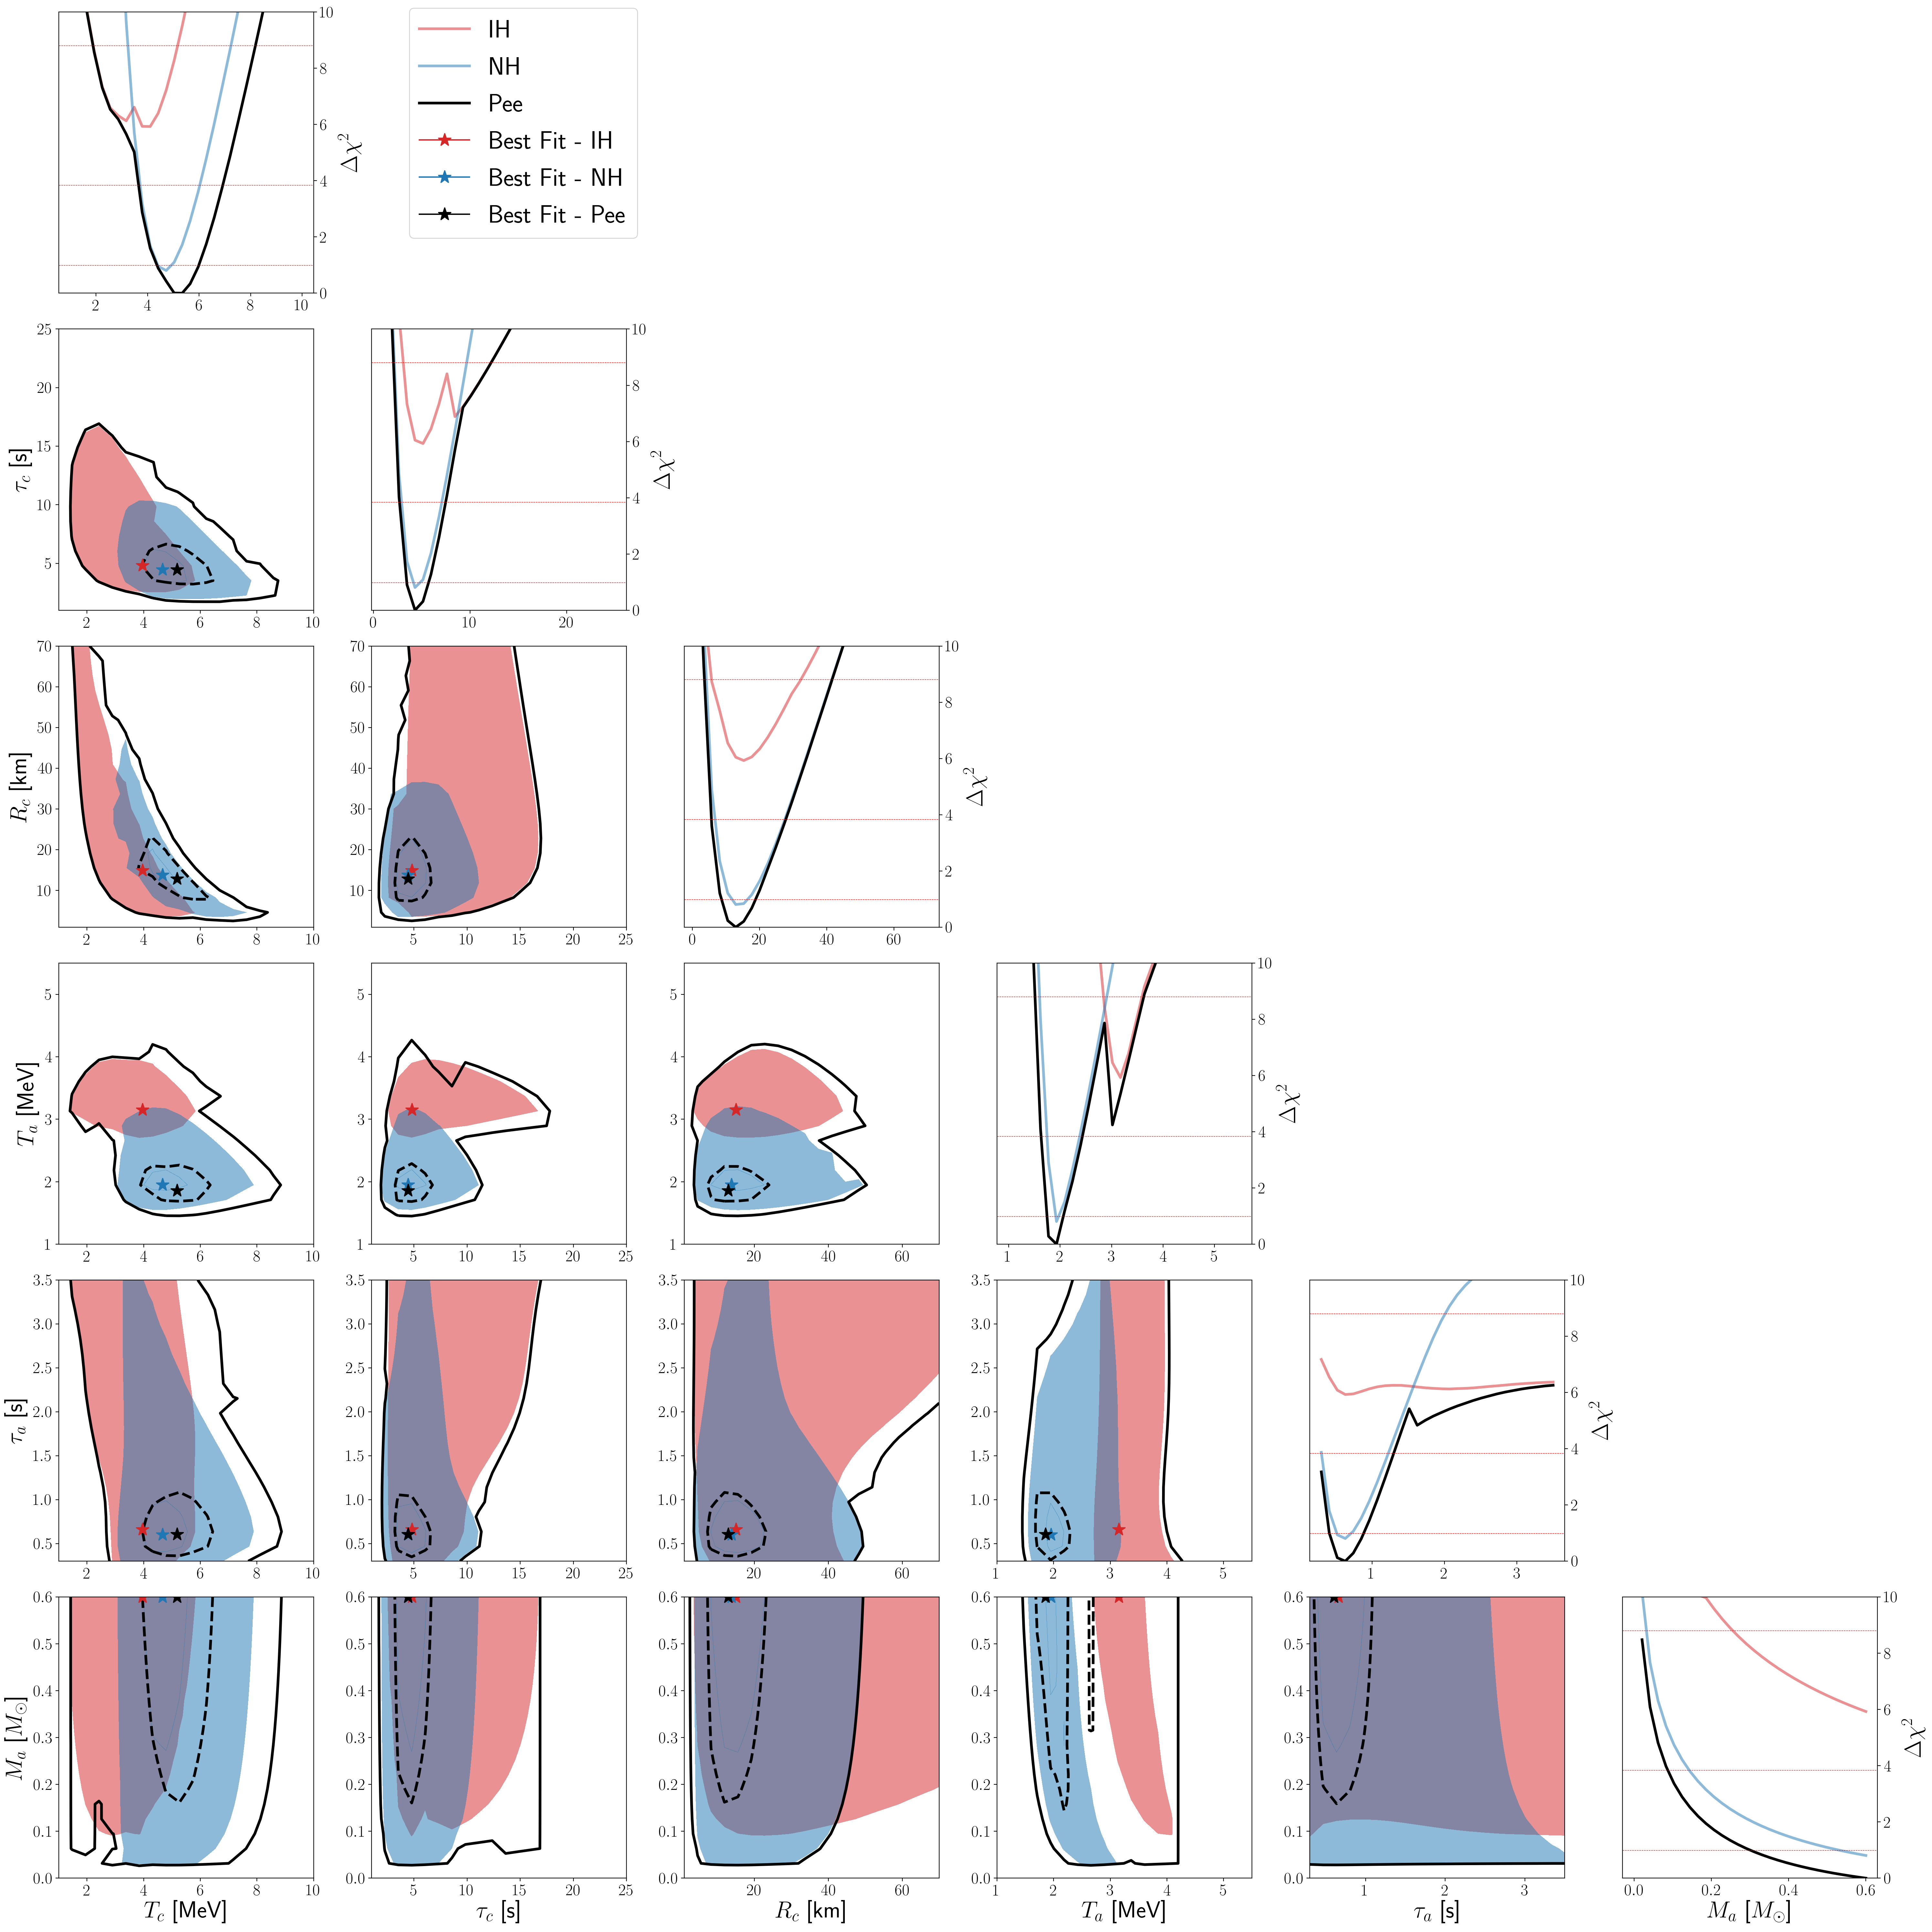

In [4]:
num_param=len(params)
font=26
lw=3

fig, ax = plt.subplots(figsize=(30, 30), ncols=num_param, nrows=num_param,dpi=200)
for i in range(num_param):
    for j in range(num_param):
        if i<j:
            fig.delaxes(ax[i, j])
            
for i in range(len(params)):
    ax_aux=ax[i,i]
    ax_aux.plot(x_c_a_IH_prof[i],L_c_a_IH_prof[i]+m_c_a_IH_BF_like-m_c_a_Pee_BF_like,lw=lw,c='tab:red', label='IH',alpha=0.5)
    ax_aux.plot(x_c_a_NH_prof[i],L_c_a_NH_prof[i]+m_c_a_NH_BF_like-m_c_a_Pee_BF_like,lw=lw,c='tab:blue', label='NH',alpha=0.5)
    ax_aux.plot(x_c_a_Pee_prof[i],L_c_a_Pee_prof[i],lw=lw,c='k', label='Pee')
    ax_aux.axhline(y=chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
    ax_aux.axhline(y=chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
    ax_aux.axhline(y=chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
    ax_aux.set_ylim(0,10)
    ax_aux.set_ylabel(r"$\Delta \chi^2$",fontsize=font)
    ax_aux.yaxis.set_label_position("right")
    ax_aux.yaxis.tick_right()
    if i==num_param-1:
        ax_aux.set_xlabel(params_label[i],fontsize=font)
    ax_aux.tick_params(axis='both', which='major', labelsize=18)

# levels=[chi2.ppf(0.68, 2)]
levels=[chi2.ppf(0, 2),chi2.ppf(0.68, 2),chi2.ppf(0.997, 2)]
l=0
for i,j in itertools.combinations(range(num_param), 2):
    ax_aux=ax[j,i]
    k=0 
    ax_aux.contourf(x_c_a_IH[l][k],y_c_a_IH[l][k],np.transpose(L_c_a_IH[l][k])+m_c_a_IH_BF_like-m_c_a_Pee_BF_like, levels=levels,colors="tab:red",alpha=0.5)
    ax_aux.plot(m_c_a_IH_BF[params_index[i]],m_c_a_IH_BF[params_index[j]],marker="*",label="Best Fit - IH", markersize=15,color="tab:red")
    
    ax_aux.contourf(x_c_a_NH[l][k],y_c_a_NH[l][k],np.transpose(L_c_a_NH[l][k])+m_c_a_NH_BF_like-m_c_a_Pee_BF_like, levels=levels,colors="tab:blue",alpha=0.5)
    ax_aux.plot(m_c_a_NH_BF[params_index[i]],m_c_a_NH_BF[params_index[j]],marker="*",label="Best Fit - NH", markersize=15,color="tab:blue")
     
    ax_aux.contour(x_c_a_Pee[l][k],y_c_a_Pee[l][k],np.transpose(L_c_a_Pee[l][k]),linewidths=lw, levels=levels,linestyles=["-","--"],colors='k')
    ax_aux.plot(m_c_a_Pee_BF[params_index[i]],m_c_a_Pee_BF[params_index[j]],marker="*",label="Best Fit - Pee", markersize=15,color="k")
    
    if i==0:
        ax_aux.set_ylabel(params_label[j],fontsize=font)
    if j==num_param-1:
        ax_aux.set_xlabel(params_label[i],fontsize=font)
    ax_aux.tick_params(axis='both', which='major', labelsize=18)
    l=l+1
    
fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.22, 0., 0.1, .999),fontsize=28)
plt.tight_layout()
plt.savefig('plots_paper/Param_Triangle_Profile_Time_Dependent_Coo_Acc_filled.pdf', dpi=160)
plt.show()